# E-commerce Customer Behavior Analysis

## Introduction
This project involves analyzing customer behavior using an E-commerce Customer Behavior dataset. The dataset provides insights into how customers interact with an e-commerce platform, including details about their demographics, spending patterns, satisfaction levels, and more. The aim of this analysis is to understand customer segments, their preferences, and to derive actionable insights for improving marketing strategies and business decisions.


## 1. Data Import and Setup
The initial step involves importing the necessary libraries and loading the dataset into a Pandas DataFrame for analysis. We'll then display the first 5 rows to ensure the data has been successfully imported.

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Customer_df = pd.read_csv(r'C:\Users\Mohsu\Desktop\python workspace\Customer Behavior\E-commerce Customer Behavior .csv')
Customer_df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


## 2. Data Cleaning and Preprocessing
check for missing values, ensure correct data types, and perform any necessary cleaning.


In [171]:
print("\n The missing values in the Customer dataset are as follows :")
Customer_df.isnull().sum()


 The missing values in the Customer dataset are as follows :


Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

we will handle the missing values in the satisfaction level column to ensure data integrity before proceeding.

In [172]:
mode_value = Customer_df['Satisfaction Level'].mode()[0]
Customer_df['Satisfaction Level'].fillna(mode_value, inplace=True)

print("\n The missing values in the Satisfaction Level after handling are as follows :")
Customer_df['Satisfaction Level'].isnull().sum()


 The missing values in the Satisfaction Level after handling are as follows :


C:\Users\Mohsu\AppData\Local\Temp\ipykernel_12788\2936317620.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Customer_df['Satisfaction Level'].fillna(mode_value, inplace=True)


np.int64(0)

Convert Satisfaction Level to numeric

In [173]:
satisfaction_mapping = {'Unsatisfied': 0, 'Neutral': 1, 'Satisfied': 2}
Customer_df['Satisfaction Level'] = Customer_df['Satisfaction Level'].map(satisfaction_mapping)

Customer_df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,2
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,1
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,0
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,2
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,0


## 3. Descriptive Statistics
we will get overview of the numerical columns in the dataset by calculating descriptive statistics.


In [174]:
print('\n This is a Summary statistics for numeric columns')
Customer_df.describe()



 This is a Summary statistics for numeric columns


,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase,Satisfaction Level
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571,1.031429
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813,0.833837
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000,0.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000,0.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000,1.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000,2.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000,2.000000


### Overview of the Data
**Customer ID :** Unique identifiers ranging from 101 to 450 for 350 customers.

**Age:**
- Range: 26–43 years.
- Mean: 33.6 years.
- Middle 50% (25th–75th percentile): 30–37 years.

**Total Spend:**
- Range: $410.80–$1520.10.
- Mean: $845.38.
- Middle 50%: $502.00–$1160.60.

**Items Purchased:**
- Range: 7–21 items.
- Mean: 12.6 items.
- Middle 50%: 9–15 items.

**Average Rating:**
- Range: 3.0–4.9.
- Mean: 4.02, showing consistently high customer satisfaction.
- Middle 50%: 3.5–4.5.

**Days Since Last Purchase:**
- Range: 9–63 days.
- Mean: 26.6 days, with high variability.
- Middle 50%: 15–38 days.

**Satisfaction Level:**
- Range: 0–2 (low to high satisfaction).
- Mean: 1.03.

## 4.City-Based Analysis

Understand how customer behavior varies across different cities.



In [175]:
city_analysis = Customer_df.groupby('City').agg({
    'Total Spend': 'mean',
    'Average Rating': 'mean',
    'Satisfaction Level': 'mean'
}).reset_index()

city_analysis = city_analysis.sort_values(by='Total Spend', ascending=False)
city_analysis

,City,Total Spend,Average Rating,Satisfaction Level
5,San Francisco,1459.772414,4.808621,2.000000
4,New York,1165.035593,4.544068,2.000000
2,Los Angeles,805.491525,4.172881,1.135593
3,Miami,690.389655,3.927586,0.000000
0,Chicago,499.882759,3.456897,0.000000
1,Houston,446.894828,3.193103,1.034483


### City-Based Analysis Visualization

Below is the visual representation of the average total spend and average rating based on city.

C:\Users\Mohsu\AppData\Local\Temp\ipykernel_12788\4109086918.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_analysis, x='City', y='Average Rating', ax=axes[0], palette='cool')


C:\Users\Mohsu\AppData\Local\Temp\ipykernel_12788\4109086918.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_analysis, x='City', y='Satisfaction Level', ax=axes[1], palette='viridis')


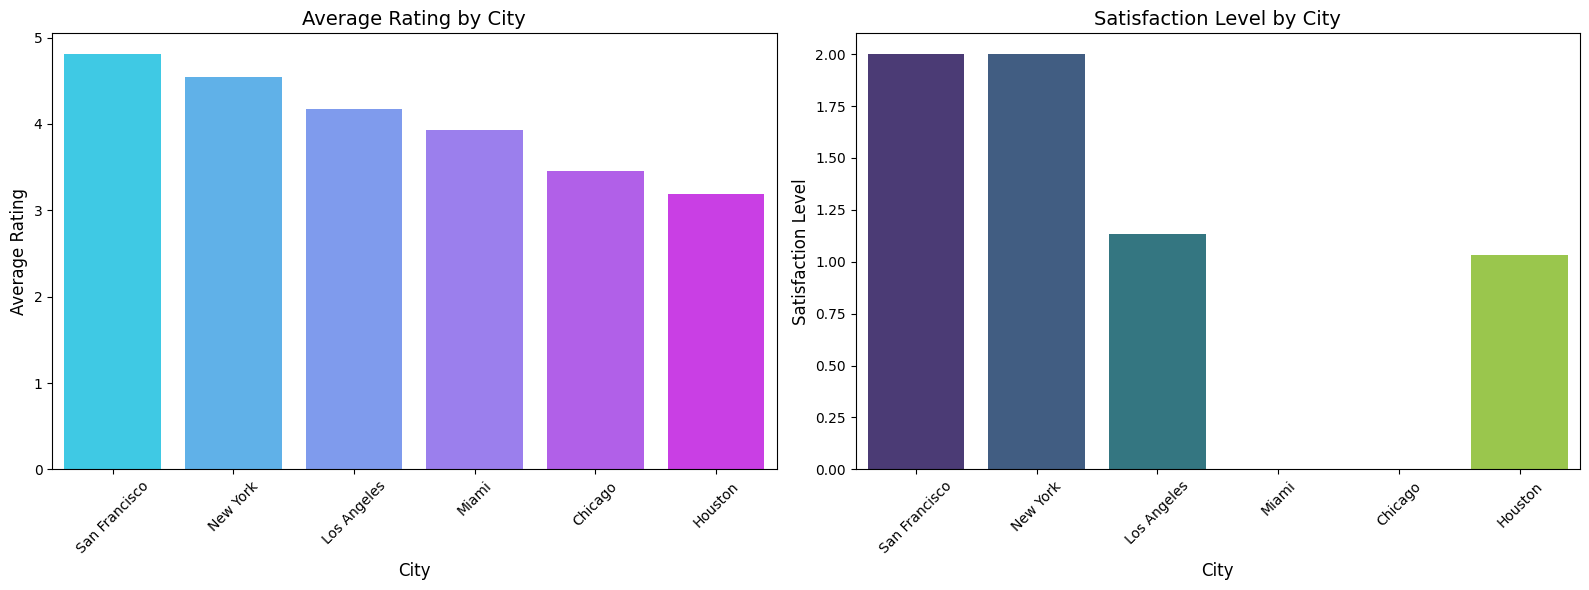

In [176]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

sns.barplot(data=city_analysis, x='City', y='Average Rating', ax=axes[0], palette='cool')
axes[0].set_title('Average Rating by City', fontsize=14)
axes[0].set_xlabel('City', fontsize=12)
axes[0].set_ylabel('Average Rating', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=city_analysis, x='City', y='Satisfaction Level', ax=axes[1], palette='viridis')
axes[1].set_title('Satisfaction Level by City', fontsize=14)
axes[1].set_xlabel('City', fontsize=12)
axes[1].set_ylabel('Satisfaction Level', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 5. Gender Segmentation Analysis
we will analyze customer behavior based on gender. We will examine the average total spend, average rating, and satisfaction level for male and female customers.


In [177]:

gender_group = Customer_df.groupby('Gender').agg({'Total Spend': 'mean', 
                                         'Average Rating': 'mean', 
                                         'Satisfaction Level': 'mean'})


gender_group


,Total Spend,Average Rating,Satisfaction Level
Gender,,,
Female,703.828571,3.731429,1.005714
Male,986.934857,4.306857,1.057143


### Gender Segmentation Visualization
Below is the visual representation of the average total spend and average rating by gender.


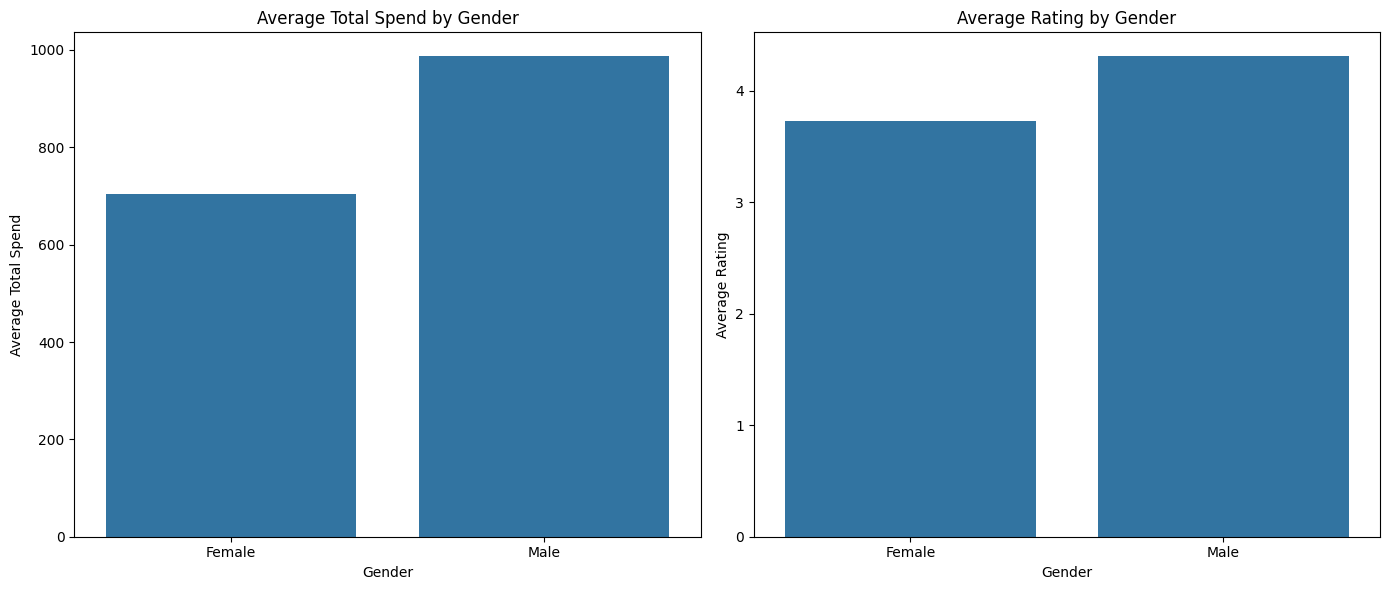

In [178]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=gender_group.index, y='Total Spend', data=gender_group, ax=axes[0])
axes[0].set_title('Average Total Spend by Gender')
axes[0].set_ylabel('Average Total Spend')

sns.barplot(x=gender_group.index, y='Average Rating', data=gender_group, ax=axes[1])
axes[1].set_title('Average Rating by Gender')
axes[1].set_ylabel('Average Rating')

plt.tight_layout()
plt.show() 

## 6. Age Segmentation Analysis
Now we will categorize customers into age groups and analyze their total spend, average rating, and satisfaction levels.


In [179]:
bins = [18, 25, 35, 45, 60, 100]
labels = ['18-25', '26-35', '36-45', '46-60', '60+']
Customer_df['Age Group'] = pd.cut(Customer_df['Age'], bins=bins, labels=labels, right=False)

age_group = Customer_df.groupby('Age Group').agg({'Total Spend': 'mean', 
                                          'Average Rating': 'mean', 
                                          'Satisfaction Level': 'mean'})
age_group

C:\Users\Mohsu\AppData\Local\Temp\ipykernel_12788\1899354423.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group = Customer_df.groupby('Age Group').agg({'Total Spend': 'mean',


,Total Spend,Average Rating,Satisfaction Level
Age Group,,,
18-25,NaN,NaN,NaN
26-35,1052.622488,4.373684,1.315789
36-45,538.195035,3.493617,0.609929
46-60,NaN,NaN,NaN
60+,NaN,NaN,NaN


### Age Segmentation Visualization
Below is the visual representation of the average total spend and average rating by age group.


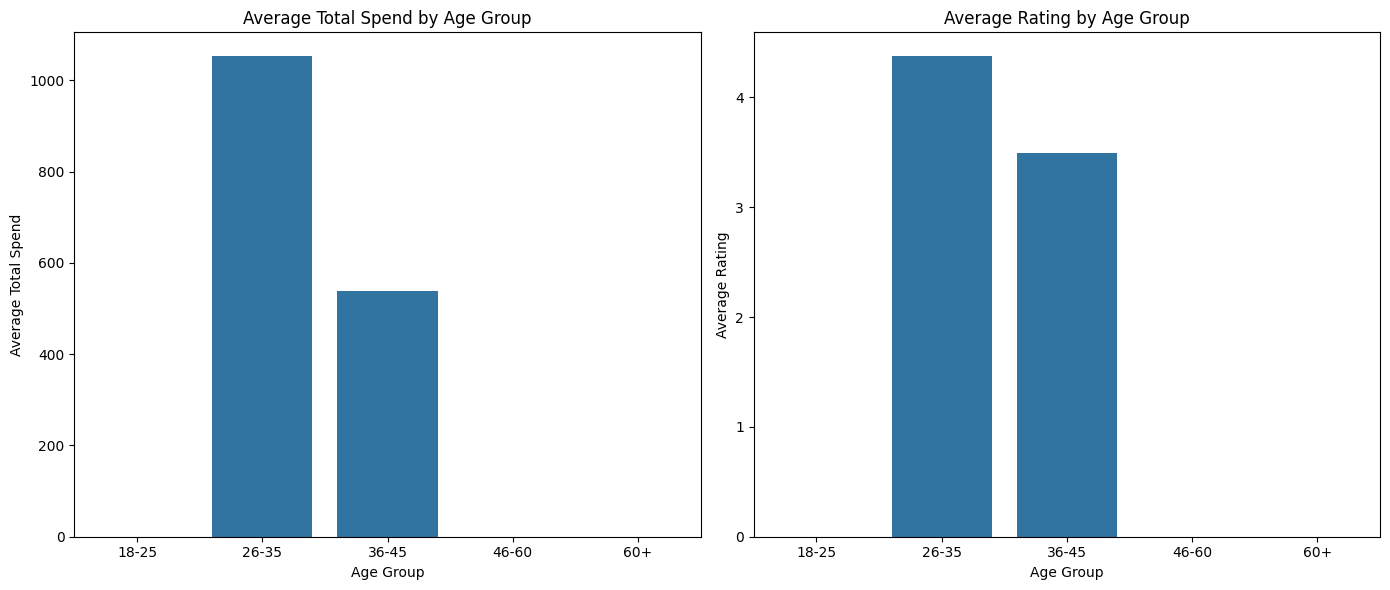

In [180]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=age_group.index, y='Total Spend', data=age_group, ax=axes[0])
axes[0].set_title('Average Total Spend by Age Group')
axes[0].set_ylabel('Average Total Spend')

sns.barplot(x=age_group.index, y='Average Rating', data=age_group, ax=axes[1])
axes[1].set_title('Average Rating by Age Group')
axes[1].set_ylabel('Average Rating')

plt.tight_layout()
plt.show()

## Grouped Bar Chart (City-Gender)

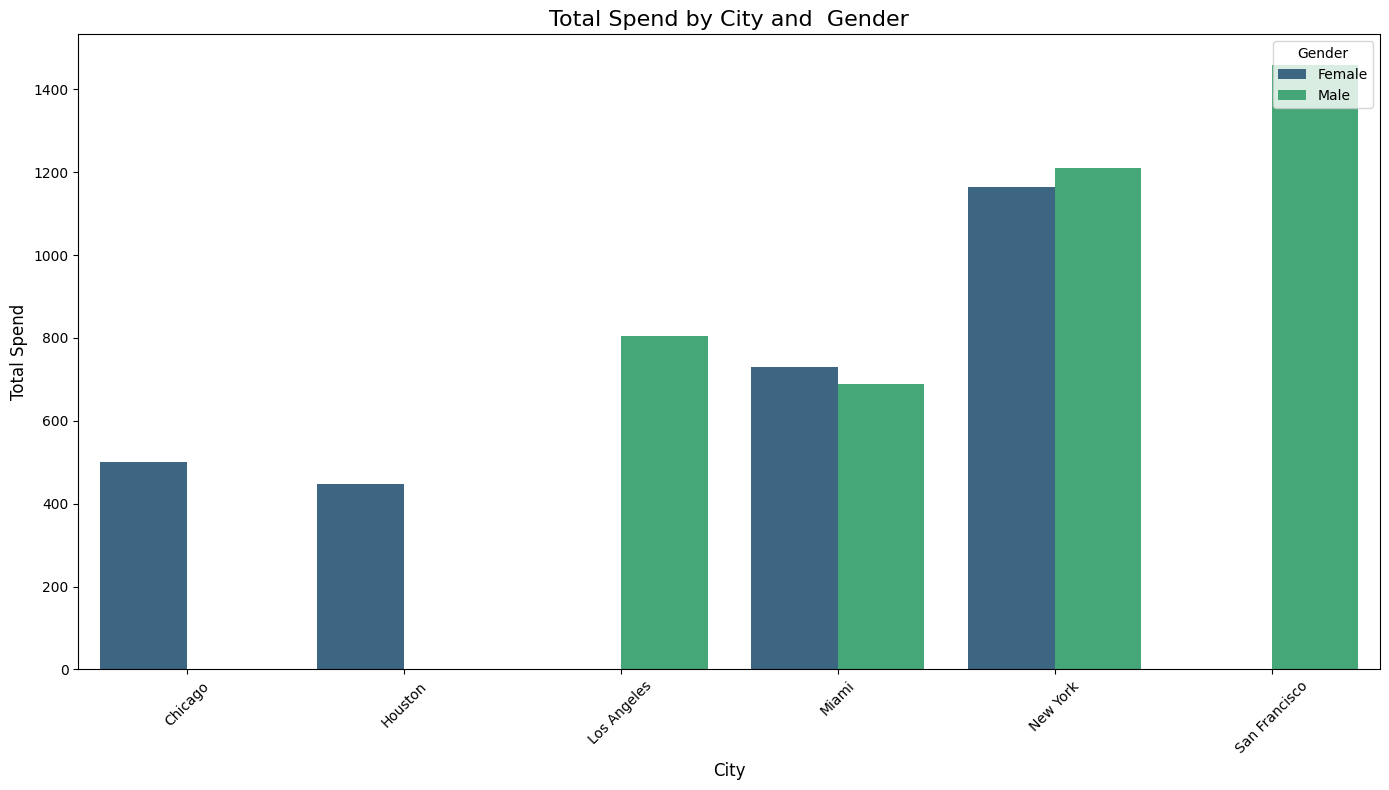

In [181]:
city_gender_age_analysis = Customer_df.groupby(['City', 'Gender']).agg({
    'Total Spend': 'mean',
    'Average Rating': 'mean',
    'Satisfaction Level': 'mean'
}).reset_index()


plt.figure(figsize=(14, 8))
sns.barplot(
    data=city_gender_age_analysis, 
    x='City', 
    y='Total Spend', 
    hue='Gender', 
    palette='viridis',
    dodge=True
)
plt.title('Total Spend by City and  Gender', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Spend', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender', fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()

## 6. Conclusion and Insights
Based on the analysis of customer behavior across city, gender, and age, the following key insights can be drawn:

- **City Insights:**
High total spending is observed in cities like San Francisco and New York, highlighting these as key markets for focused marketing strategies. Conversely, cities like Chicago and Houston show lower spending, suggesting opportunities for targeted promotional campaigns to boost engagement and revenue.

- **Gender Insights:**
Male customers exhibit higher total spending compared to female customers. This suggests the potential for marketing strategies that emphasize high-value products and services for male customers, particularly in underperforming regions.

- **Age Insights:**
Customers aged 26-35 demonstrate the highest average ratings and total spending. Tailored marketing campaigns, loyalty programs, and personalized experiences for this age group could further enhance customer satisfaction and spending.

